##Objetivo

  El objetivo de este trabajo es elegir un conjunto de datos que presente distintas variables que nos permitan realizar un análisis con el fin de, en un futuro, poder realizar un algoritmo de predicción que estime el valor de una de las variables.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Dataset elegido

Para este caso se eligió un dataset que consta de 5172 filas y 3002 columnas. Cada fila representa un email mientras que la primera columna representa el número de mail y la última columna (Prediction) representa si el email es spam (1) o no es spam (0). Las 3000 columnas restantes representan cada una una palabra, dónde el valor indica la cantidad de veces que esa palabra se repite en un mail.

La variable que nos interesa predecir en un futuro a partir de los datos que tenemos es la que representa la ya mencionada columna ‘Prediction’.

In [5]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/emails.csv')
df.shape

(5172, 3002)

In [6]:
# Imprimo las primeras 5 filas para obtener una vista previa del dataframe.

df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


##Exploración de datos

Para el desarrollo de este trabajo se procedió a realizar distintos gráficos usando las librerías de “matplotlib” y “seaborn” que permiten realizar visualizaciones en Python.

Con estos gráficos, se busca representar datos y características del dataset que nos puedan ser útiles para identificar patrones y relaciones que a su vez también nos pueden ser de ayuda para el uso de algoritmos predictivos en las siguientes entregas.

Con los datos proporcionados por la función describe() podemos ver algunas características e información relevante acerca del dataframe, como por ejemplo la palabra más repetida dentro de un solo mail o las palabras que están presentes en todos los mails

In [8]:
df_info = df.describe()
df_info

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [9]:
# La palabra que más se repite dentro de un solo mail
max = df_info.loc['max'].max()
max_column_name = df_info.loc['max'].idxmax()
print("Palabra más repetida dentro de un mail: " + max_column_name + " con " + str(max) + " repeticiones")

# Las palabras que tienen valor mínimo mayor a 0, es decir, están presentes en todos los mails
columnas_con_min_mayor_a_0 = df_info.columns[df_info.loc['min'] > 0]
print("Palabras que están presentes en todos los mails: " + str(columnas_con_min_mayor_a_0.values))

Palabra más repetida dentro de un mail: e con 2327.0 repeticiones
Palabras que están presentes en todos los mails: ['ect' 'e' 't' 'j' 'b' 'c' 'u' 'ct']



###Modificación del dataframe

Para nuestro análisis, en principio, todas las columnas nos serán útiles ya que tendremos que tratar de identificar patrones que en un futuro nos permitan utilizar un algoritmo para predecir si el mail es spam o no.
Sin embargo, con el fin de tratar de realizar el análisis con expresiones que puedan ser identificables, consideraremos solo las expresiones o palabras que contengan 3 o más caracteres. De esta manera se eliminan las expresiones de un solo caracter y conectores de 2 caracteres que están presentes en todos los mails. Esto aplicará para todo el desarrollo que se va a presentar.

In [10]:
df = df.filter(regex='^[^\W\d_]{3,}$', axis=1)
df

,the,ect,and,for,you,hou,this,enron,that,will,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,dry,Prediction
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,24,6,6,1,27,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,22,0,5,2,10,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,17,1,5,0,9,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,35,11,2,6,4,3,3,1,6,2,...,0,0,0,0,0,0,0,0,0,0
5169,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,2,1,0,2,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


###Análisis del dataframe

A continuación se presentarán distintos gráficos que buscan identificar algún patrón o característica que nos permita visualizar las diferencias entre un mail clasificado como spam o un mail clasificado como no spam.

####Distribución de la cantidad de palabras

Se realiza un recuento total de la cantidad de palabras para cada mail, y se grafican en un boxplot a modo de poder visualizar que cantidad de mails existen por encima de la media de cantidad de palabras.

In [11]:
df_total_words = df.copy() # Realizamos una copia para no modificar el dataframe original.
df_total_words['Total_Words'] = df_total_words.drop('Prediction', axis=1).sum(axis=1)
df_total_words

,the,ect,and,for,you,hou,this,enron,that,will,...,connevey,jay,valued,lay,infrastructure,military,allowing,dry,Prediction,Total_Words
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,8,24,6,6,1,27,0,1,2,0,...,0,0,0,0,0,0,0,0,0,421
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
3,0,22,0,5,2,10,2,0,0,0,...,0,0,0,0,0,0,0,0,0,191
4,7,17,1,5,0,9,2,0,0,0,...,0,0,0,0,0,0,0,0,0,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,93
5168,35,11,2,6,4,3,3,1,6,2,...,0,0,0,0,0,0,0,0,0,496
5169,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,29
5170,2,1,0,2,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,116


Text(0, 0.5, 'Cantidad Total de Palabras por Correo')

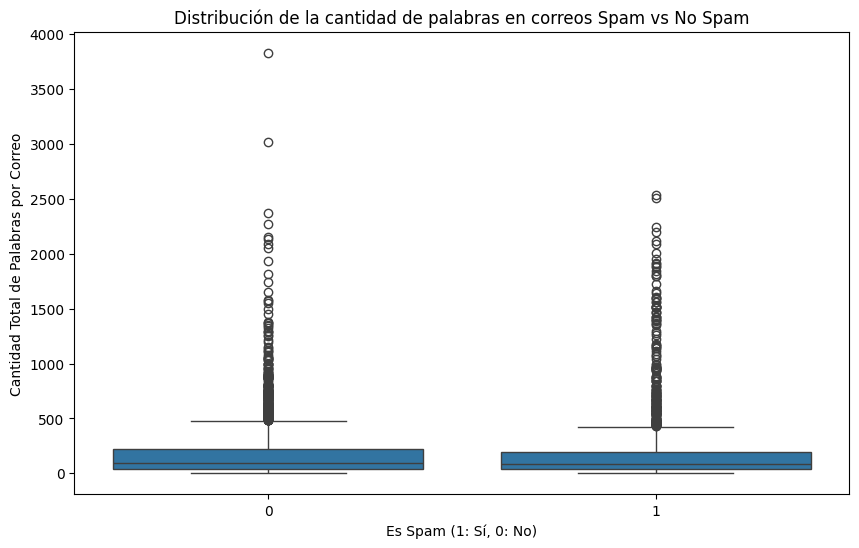

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Prediction', y='Total_Words', data=df_total_words)
plt.title('Distribución de la cantidad de palabras en correos Spam vs No Spam')
plt.xlabel('Es Spam (1: Sí, 0: No)')
plt.ylabel('Cantidad Total de Palabras por Correo')

####Top 30 palabaras más repetidas para spam/no spam

Se realiza un gráfico de barras que muestra la cantidad de repeticiones de las 30 palabras más repetidas existentes entre los mails que son spam y los que no.

In [13]:
# Se crean dos dataframes distintos. Uno contiene los mails que son spam (Prediction = 1), y otro contiene los mails que NO son spam (Prediction = 0).

df_prediction_1 = df[df['Prediction'] == 1]
df_prediction_0 = df[df['Prediction'] == 0]

In [14]:
# Se crean dos series distintas que contienen todas las palabras y la suma total de apariciones para ambos casos.

suma_palabras_prediction_1 = df_prediction_1.sum()
suma_palabras_prediction_1 = suma_palabras_prediction_1.drop(suma_palabras_prediction_1.index[-1]) # Elimino la última fila que pertenece a la columna 'Prediction'

suma_palabras_prediction_0 = df_prediction_0.sum()
suma_palabras_prediction_0 = suma_palabras_prediction_0.drop(suma_palabras_prediction_0.index[-1]) # Elimino la última fila que pertenece a la columna 'Prediction'

In [15]:
suma_palabras_prediction_1

the               9839
ect               3719
and               6236
for               4653
you               5019
                  ... 
lay                233
infrastructure      15
military            31
allowing             8
dry                  9
Length: 2847, dtype: int64

In [16]:
suma_palabras_prediction_0

the               24506
ect               22885
and                9671
for               11508
you                7738
                  ...  
lay                 274
infrastructure        7
military              3
allowing             13
dry                  27
Length: 2847, dtype: int64

In [17]:
# Se ordena cada una de estas series de manera de poder seleccionar las 30 primeras, que van a corresponder a las 30 palabras con más apariciones

suma_palabras_prediction_1_ordenado = suma_palabras_prediction_1.sort_values(ascending=False)
top30_palabras_prediction_1 = suma_palabras_prediction_1_ordenado.head(30)
top30_palabras_prediction_1

the     9839
and     6236
you     5019
for     4653
com     4054
our     3950
ect     3719
pro     3140
her     2681
his     2630
men     2608
est     2446
all     2324
are     2307
this    2303
your    2096
with    2006
der     1774
one     1730
per     1723
ail     1697
any     1691
act     1616
not     1514
ali     1497
age     1403
that    1361
rom     1342
man     1336
red     1302
dtype: int64

In [18]:
suma_palabras_prediction_0_ordenado = suma_palabras_prediction_0.sort_values(ascending=False)
top30_palabras_prediction_0 = suma_palabras_prediction_0_ordenado.head(30)
top30_palabras_prediction_0

the      24506
ect      22885
for      11508
and       9671
hou       9532
you       7738
enron     6906
his       5140
com       5086
are       4978
this      4879
her       4793
all       4433
our       3945
wil       3734
will      3663
pro       3596
deal      3560
act       3495
rom       3449
that      3420
hpl       3281
have      3257
from      3215
met       3125
day       3116
est       2998
gas       2945
men       2917
with      2854
dtype: int64

Primero se representan las 30 palabras más repetidas para el caso de los mails que están clasificados como spam.

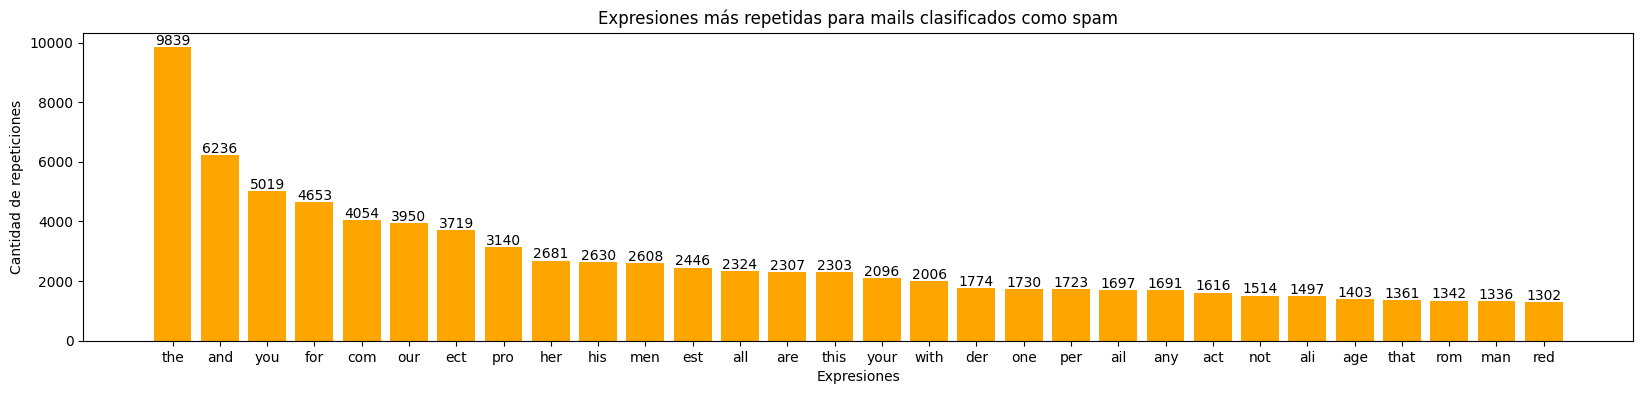

In [19]:
fig, ax = plt.subplots(figsize=(20, 4))

ax.bar(top30_palabras_prediction_1.index, top30_palabras_prediction_1.values, color="orange")

ax.set_xlabel('Expresiones')
ax.set_ylabel('Cantidad de repeticiones')
ax.set_title('Expresiones más repetidas para mails clasificados como spam')

labels = top30_palabras_prediction_1.tolist()
rects = ax.patches

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 450, label, ha="center", va="top"
    )

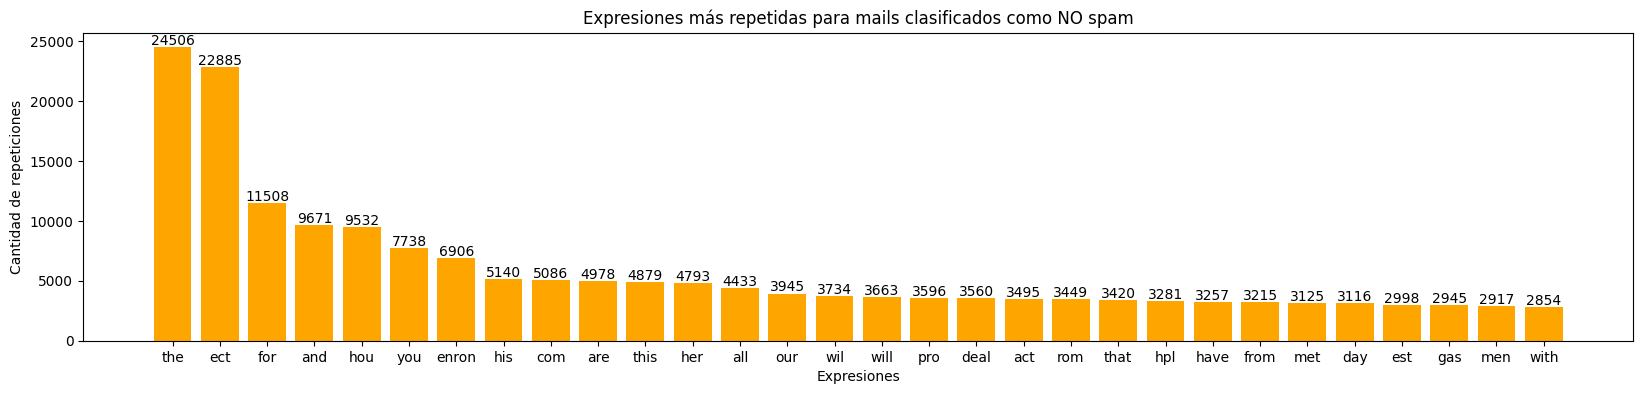

In [20]:
fig, ax = plt.subplots(figsize=(20, 4))

ax.bar(top30_palabras_prediction_0.index, top30_palabras_prediction_0.values, color="orange")

ax.set_xlabel('Expresiones')
ax.set_ylabel('Cantidad de repeticiones')
ax.set_title('Expresiones más repetidas para mails clasificados como NO spam')

labels = top30_palabras_prediction_0.tolist()
rects = ax.patches

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 1100, label, ha="center", va="top"
    )

####Frecuencia de cantidad de palabras para spam/no spam

El siguiente gráfico a realizar representa la frecuencia en la cantidad de palabras por mail en cada caso.

In [21]:
# Calculo la suma de todas las palabras para cada mail.

cant_palabras_por_mail_spam = df_prediction_1.sum(axis=1)
cant_palabras_por_mail_no_spam = df_prediction_0.sum(axis=1)

In [22]:
cant_palabras_por_mail_spam

5       187
7        91
16       35
17      679
25      607
       ... 
5162    107
5163     11
5166     15
5169     30
5170    117
Length: 1500, dtype: int64

In [23]:
cant_palabras_por_mail_no_spam

0         6
1       421
2        22
3       191
4       193
       ... 
5164    340
5165     36
5167     93
5168    496
5171    465
Length: 3672, dtype: int64

Text(0.5, 1.0, 'Histograma de Cantidad de palabras para cada mail clasificado como spam')

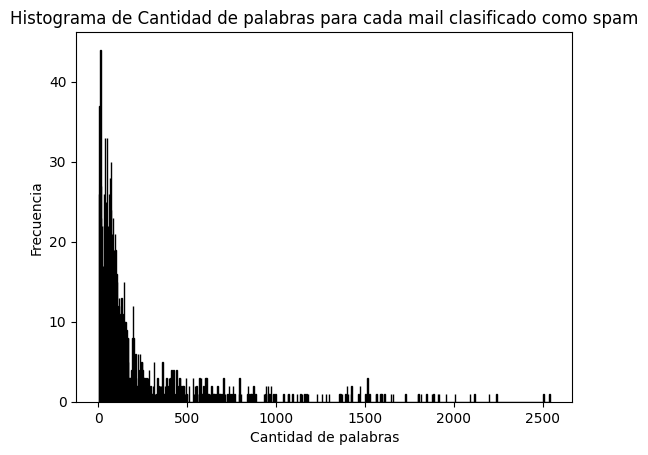

In [24]:
plt.hist(cant_palabras_por_mail_spam.values, bins=1000, color='skyblue', edgecolor='black')

plt.xlabel('Cantidad de palabras')
plt.ylabel('Frecuencia')
plt.title('Histograma de Cantidad de palabras para cada mail clasificado como spam')

Graficamente podemos observar que la mayoría de mails se encuentra en el orden de entre 0 y 1000 expresiones. Se puede destacar que por ejemplo, existe aproximadamente la misma cantidad de mails
que tienen 1000 palabras y 1500 palabras.

Realizamos lo mismo para el caso de mails clasificados como no spam

Text(0.5, 1.0, 'Histograma de Cantidad de palabras para cada mail clasificado como NO spam')

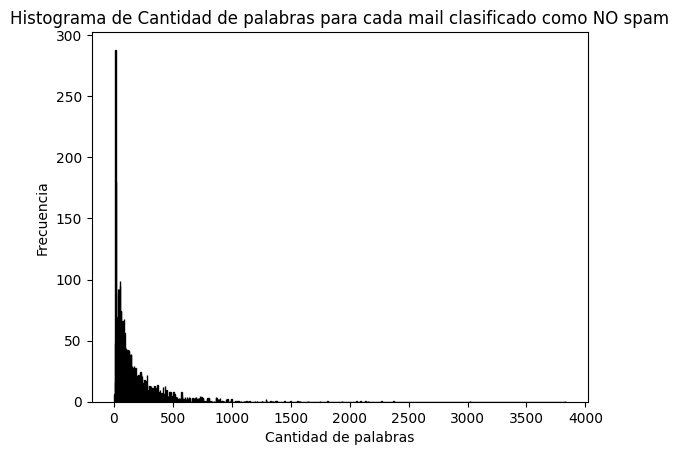

In [25]:
plt.hist(cant_palabras_por_mail_no_spam.values, bins=1000, color='skyblue', edgecolor='black')

plt.xlabel('Cantidad de palabras')
plt.ylabel('Frecuencia')
plt.title('Histograma de Cantidad de palabras para cada mail clasificado como NO spam')

Se puede observar entonces que en el caso de mails que no son spam, suelen tener una cantidad de palabras que está dentro del intervalo de 0 y 1000, y casi no existen mails con más de 1500 palabras
(a diferencia del caso anterior dónde existen gran cantidad de mails con más de 1500 e incluso 2000 palabras)

####Concentración de mails clasificados como spam/no spam

Se realiza un gráfico de tipo scatterplot para visualizar la concentración de mails clasificados como spam o no spam en función de la cantidad de palabras

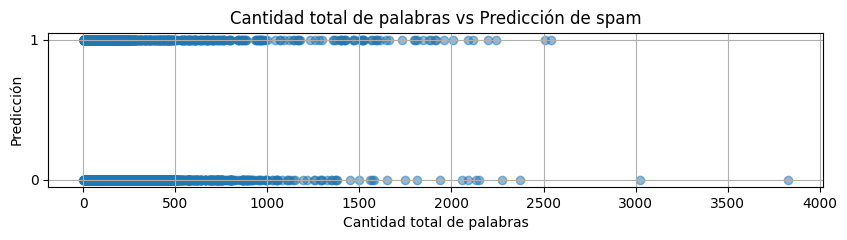

In [26]:
df_total_words = df.copy()
df_total_words['Total_words'] = df_total_words.sum(axis=1) # Creamos la columna 'Total_words' para representar la cantidad total de palabras en cada mail.
df_total_words['Prediction'] = df_total_words['Prediction'].astype(int) # Convertimos la columna a int para que no se reprensenten valores decimales en el gráfico.

plt.figure(figsize=(10, 2))
plt.scatter(df_total_words['Total_words'], df_total_words['Prediction'], alpha=0.5)
plt.title('Cantidad total de palabras vs Predicción de spam')
plt.xlabel('Cantidad total de palabras')
plt.ylabel('Predicción')
plt.yticks([0, 1]) # Establecemos solo 0 y 1 como valores del eje Y.
plt.grid(True)
plt.show()


El siguiente gráfico a realizar es un gráfico de barras que, a diferencia de los realizados anteriormente, representa al mismo tiempo la frecuencia de repetición de las 30 palabras que más aparecen en ambos casos (spam o no spam). De esta manera se puede visualizar mejor la diferencia entre los casos.

In [27]:
# Generamos copias de las series que representan el top 30 de palabras más repetidas para ambos casos

top30_spam = top30_palabras_prediction_1.copy()
top30_no_spam = top30_palabras_prediction_0.copy()

In [28]:
# Ahora creamos dataframes a partir de estas series para manejar mejor los índices

df_top30_spam = top30_spam.reset_index().rename(columns={'index': 'Word', 0: 'Frequency'})
df_top30_no_spam = top30_no_spam.reset_index().rename(columns={'index': 'Word', 0: 'Frequency'})

In [29]:
df_top30_no_spam

,Word,Frequency
0,the,24506
1,ect,22885
2,for,11508
3,and,9671
4,hou,9532
5,you,7738
6,enron,6906
7,his,5140
8,com,5086
9,are,4978


In [30]:
df_top30_spam

,Word,Frequency
0,the,9839
1,and,6236
2,you,5019
3,for,4653
4,com,4054
5,our,3950
6,ect,3719
7,pro,3140
8,her,2681
9,his,2630


In [31]:
# Agregamos una nueva columna que identifique si las palabras pertenecen a mails que son spam o no, para posteriormente unir estos dataframes en un solo dataframe nuevo

df_top30_spam['Category'] = 'Spam'
df_top30_no_spam['Category'] = 'No Spam'

In [32]:
df_top30_no_spam

,Word,Frequency,Category
0,the,24506,No Spam
1,ect,22885,No Spam
2,for,11508,No Spam
3,and,9671,No Spam
4,hou,9532,No Spam
5,you,7738,No Spam
6,enron,6906,No Spam
7,his,5140,No Spam
8,com,5086,No Spam
9,are,4978,No Spam


In [33]:
df_top30_spam

,Word,Frequency,Category
0,the,9839,Spam
1,and,6236,Spam
2,you,5019,Spam
3,for,4653,Spam
4,com,4054,Spam
5,our,3950,Spam
6,ect,3719,Spam
7,pro,3140,Spam
8,her,2681,Spam
9,his,2630,Spam


In [34]:
df_combinado = pd.concat([df_top30_spam, df_top30_no_spam]) # Concatenamos ambos dataframes en uno solo
df_combinado

,Word,Frequency,Category
0,the,9839,Spam
1,and,6236,Spam
2,you,5019,Spam
3,for,4653,Spam
4,com,4054,Spam
5,our,3950,Spam
6,ect,3719,Spam
7,pro,3140,Spam
8,her,2681,Spam
9,his,2630,Spam


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 [Text(0, 0, 'the'),
  Text(1, 0, 'and'),
  Text(2, 0, 'you'),
  Text(3, 0, 'for'),
  Text(4, 0, 'com'),
  Text(5, 0, 'our'),
  Text(6, 0, 'ect'),
  Text(7, 0, 'pro'),
  Text(8, 0, 'her'),
  Text(9, 0, 'his'),
  Text(10, 0, 'men'),
  Text(11, 0, 'est'),
  Text(12, 0, 'all'),
  Text(13, 0, 'are'),
  Text(14, 0, 'this'),
  Text(15, 0, 'your'),
  Text(16, 0, 'with'),
  Text(17, 0, 'der'),
  Text(18, 0, 'one'),
  Text(19, 0, 'per'),
  Text(20, 0, 'ail'),
  Text(21, 0, 'any'),
  Text(22, 0, 'act'),
  Text(23, 0, 'not'),
  Text(24, 0, 'ali'),
  Text(25, 0, 'age'),
  Text(26, 0, 'that'),
  Text(27, 0, 'rom'),
  Text(28, 0, 'man'),
  Text(29, 0, 'red'),
  Text(30, 0, 'hou'),
  Text(31, 0, 'enron'),
  Text(32, 0, 'wil'),
  Text(33, 0, 'will'),
  Text(34, 0, 'dea

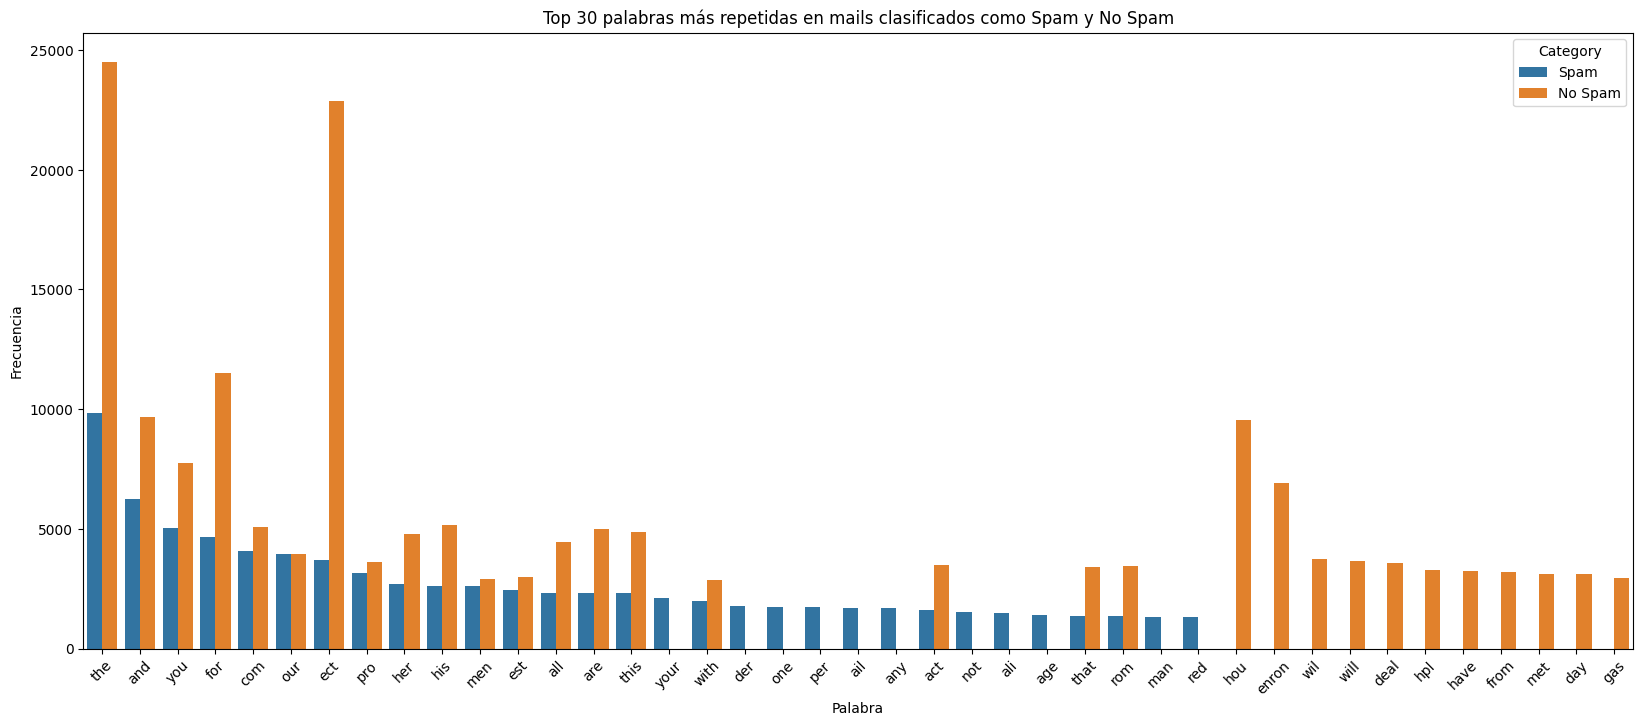

In [35]:
# Generamos el gráfico usando seaborn. A diferencia de los gráficos realizados anteriormente, podemos ver en el mismo gráfico de barras las categorías de spam y no spam.

plt.figure(figsize=(20, 8))
sns.barplot(x='Word', y='Frequency', hue='Category', data=df_combinado, dodge=True)

plt.title('Top 30 palabras más repetidas en mails clasificados como Spam y No Spam')
plt.ylabel('Frecuencia')
plt.xlabel('Palabra')
plt.xticks(rotation=45)

####Longitud de las top 100 palabras más repetidas para spam/no spam

El siguiente gráfico es un gráfico de líneas que muestra la longitud de las 100 palabras más repetidas para cada caso.

In [36]:
df_copiado = df_prediction_1.copy()
top_100_spam = df_copiado.sum().sort_values(ascending=False)[:100] # Seleccionamos las primeras 100 palabras
top_100_spam

the       9839
and       6236
you       5019
for       4653
com       4054
          ... 
www        597
ever       579
prod       573
inform     565
lls        565
Length: 100, dtype: int64

In [37]:
df_copiado = df_prediction_0.copy()
top_100_no_spam = df_copiado.sum().sort_values(ascending=False)[:100] # Seleccionamos las primeras 100 palabras
top_100_no_spam

the         24506
ect         22885
for         11508
and          9671
hou          9532
            ...  
tim          1174
form         1160
new          1160
line         1147
contract     1145
Length: 100, dtype: int64

In [38]:
# Generamos una serie que representa la longitud de cada una de las palabras para cada caso

longitud_palabras_spam = top_100_spam.index.map(len)
longitud_palabras_spam_serie = pd.Series(longitud_palabras_spam, index=top_100_spam.index)

longitud_palabras_no_spam = top_100_no_spam.index.map(len)
longitud_palabras_no_spam_serie = pd.Series(longitud_palabras_no_spam, index=top_100_no_spam.index)

In [39]:
longitud_palabras_spam_serie

the       3
and       3
you       3
for       3
com       3
         ..
www       3
ever      4
prod      4
inform    6
lls       3
Length: 100, dtype: int64

In [40]:
longitud_palabras_no_spam_serie

the         3
ect         3
for         3
and         3
hou         3
           ..
tim         3
form        4
new         3
line        4
contract    8
Length: 100, dtype: int64

In [41]:
# Los volvemos a transformar en un dataframe para ponerle nombre a las columnas

df_longitud_spam = longitud_palabras_spam_serie.reset_index()
df_longitud_spam.columns = ['Palabra', 'Longitud']

df_longitud_no_spam = longitud_palabras_no_spam_serie.reset_index()
df_longitud_no_spam.columns = ['Palabra', 'Longitud']

In [42]:
df_longitud_spam

,Palabra,Longitud
0,the,3
1,and,3
2,you,3
3,for,3
4,com,3
...,...,...
95,www,3
96,ever,4
97,prod,4
98,inform,6


In [43]:
df_longitud_no_spam

,Palabra,Longitud
0,the,3
1,ect,3
2,for,3
3,and,3
4,hou,3
...,...,...
95,tim,3
96,form,4
97,new,3
98,line,4


Generamos un gráfico de lineas para cada caso.

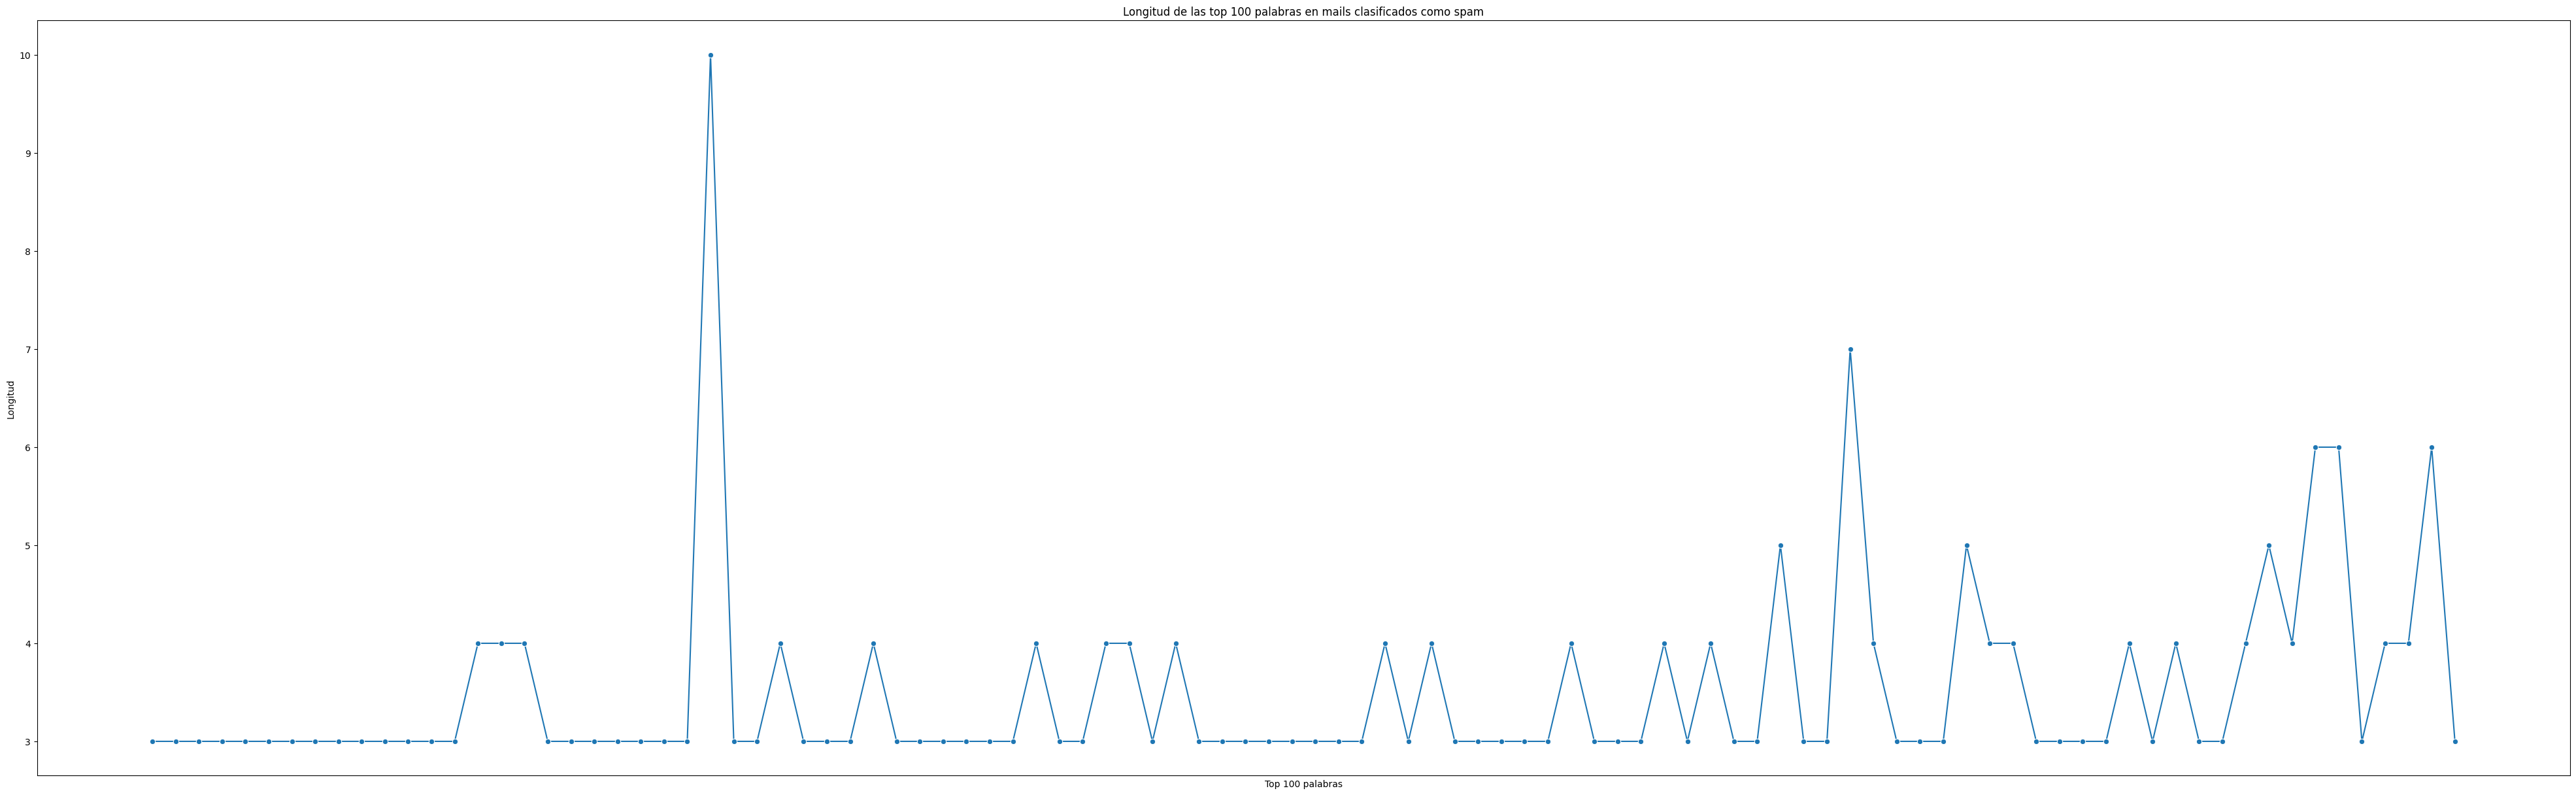

In [44]:
# Mails clasificados como spam

plt.figure(figsize=(50, 15))
sns.lineplot(x=df_longitud_spam.index, y='Longitud', data=df_longitud_spam, marker='o')
plt.title('Longitud de las top 100 palabras en mails clasificados como spam')
plt.xlabel('Top 100 palabras')
plt.ylabel('Longitud')
plt.xticks([])
plt.grid(False)

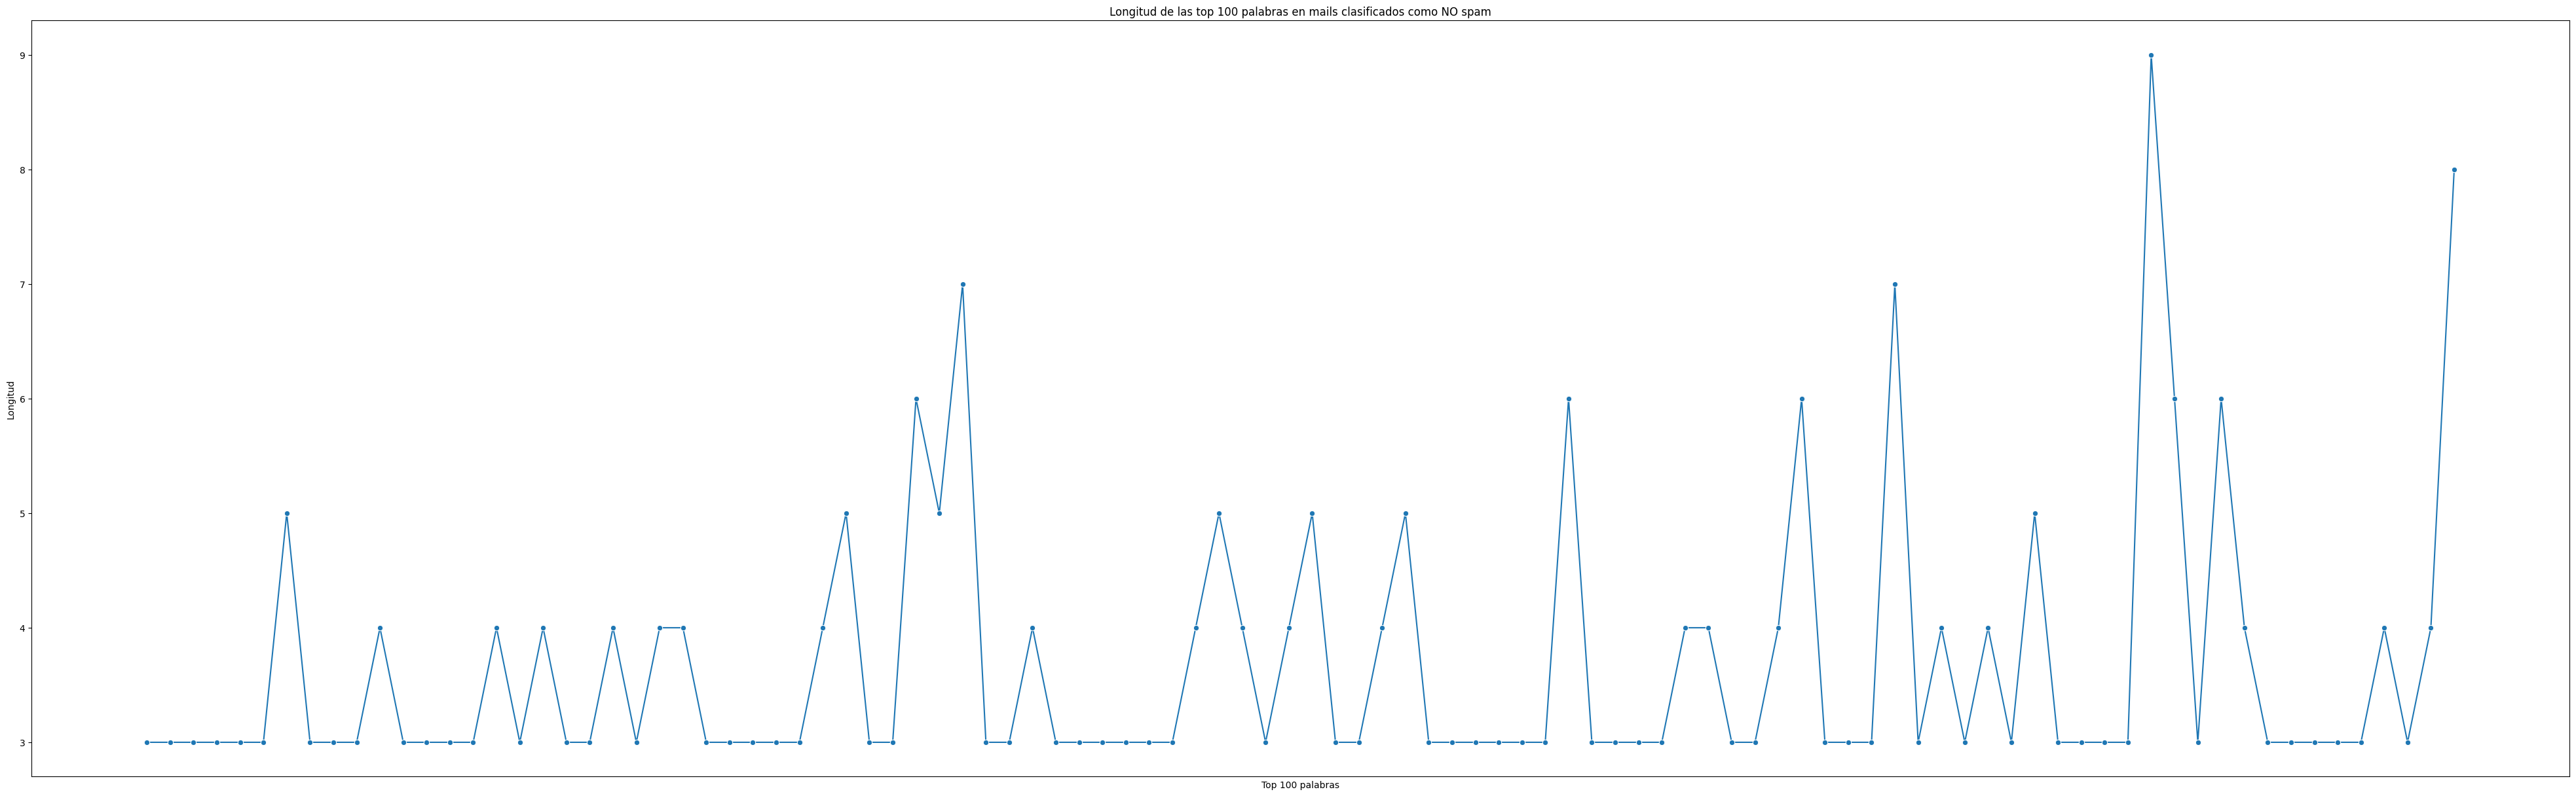

In [45]:
# Mails clasificados como no spam

plt.figure(figsize=(50, 15))
sns.lineplot(x=df_longitud_no_spam.index, y='Longitud', data=df_longitud_no_spam, marker='o')
plt.title('Longitud de las top 100 palabras en mails clasificados como NO spam')
plt.xlabel('Top 100 palabras')
plt.ylabel('Longitud')
plt.xticks([])
plt.grid(False)

####Gráfico de correlaciones

En siguiente, generamos un gráfico de correlaciones. Para esto, calculamos las correlaciones de cada palabra con la palabra 'Prediction', que es valor que me interesa y seleccionamos las que tienen un valor de correlación mayor a 0.15 para mostrar las palabras que más se relacionan con dicha columna.

In [46]:
df_copiado = df.copy()

In [47]:
corr = df_copiado.corr()
corr = corr.abs()
correlaciones = corr['Prediction'] # Selecciono solo los valores de la columna Prediction porque es la que me interesa.
correlaciones

the               0.004421
ect               0.120782
and               0.114364
for               0.003101
you               0.130293
                    ...   
infrastructure    0.038161
military          0.064850
allowing          0.011279
dry               0.006260
Prediction        1.000000
Name: Prediction, Length: 2848, dtype: float64

In [48]:
correlaciones = correlaciones[correlaciones > 0.15][:-1] # Elimino la última fila 'Prediction' para realizar el gráfico
correlaciones = correlaciones.reset_index()
correlaciones.columns = ['Palabra', 'Coeficiente de Correlación']
correlaciones

,Palabra,Coeficiente de Correlación
0,enron,0.186740
1,your,0.186149
2,gas,0.156652
3,deal,0.190407
4,meter,0.166499
...,...,...
81,die,0.152856
82,anti,0.165455
83,cia,0.191742
84,der,0.154688


Text(0, 0.5, 'Coeficiente')

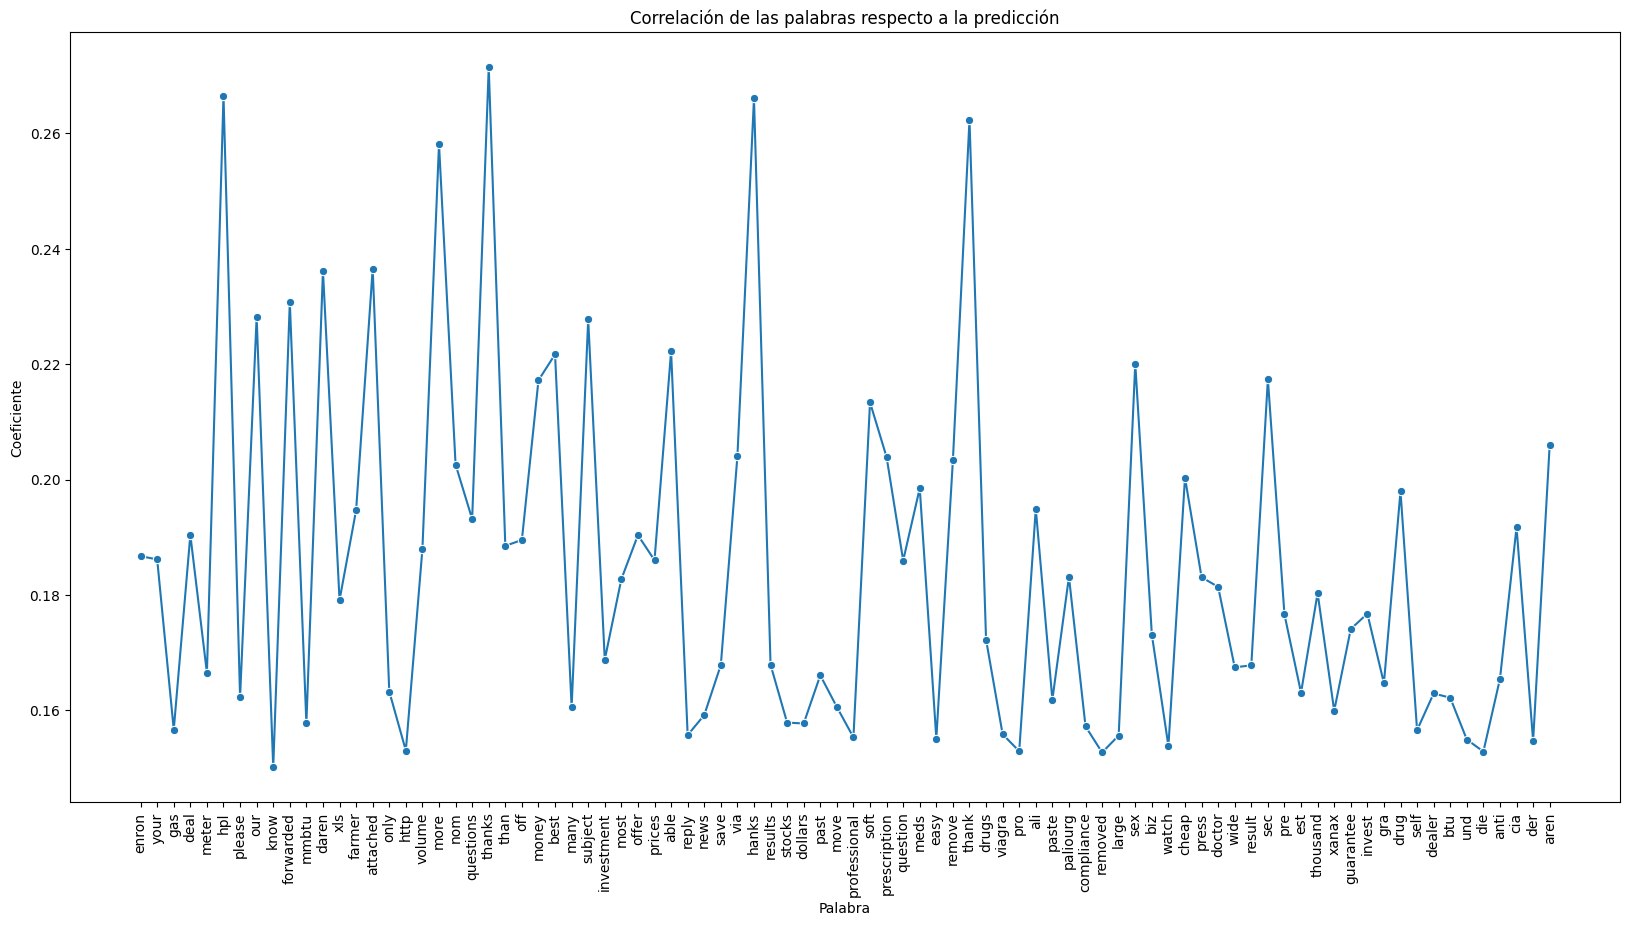

In [49]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='Palabra', y='Coeficiente de Correlación', data=correlaciones, marker='o')
plt.title('Correlación de las palabras respecto a la predicción')
plt.xticks(rotation=90)  # Rotando las etiquetas del eje x para mejor visualización
plt.xlabel('Palabra')
plt.ylabel('Coeficiente')

####Longitud media de las palabras para cada mail

Ahora se genera un gráfico de tipo boxplot que representa la longitud media de las palabras presentes en cada mail. Esto nos permite visualizar, en promedio, que tipo de palabras tiene cada mail.

In [50]:
df_copiado = df.copy()
total_palabras = df_copiado.sum().sort_values(ascending=False)
total_palabras

the          34345
ect          26604
for          16161
and          15907
you          12757
             ...  
explosion       21
decisions       21
returns         21
offsystem       21
padre           21
Length: 2848, dtype: int64

In [51]:
longitud_palabras_total = total_palabras.index.map(len)
longitud_palabras_total_serie = pd.Series(longitud_palabras_total, index=total_palabras.index)
longitud_palabras_total_serie

the          3
ect          3
for          3
and          3
you          3
            ..
explosion    9
decisions    9
returns      7
offsystem    9
padre        5
Length: 2848, dtype: int64

In [52]:
df_longitud_palabras_total = longitud_palabras_total_serie.reset_index()
df_longitud_palabras_total.columns = ['Palabra', 'Longitud']
df_longitud_palabras_total

,Palabra,Longitud
0,the,3
1,ect,3
2,for,3
3,and,3
4,you,3
...,...,...
2843,explosion,9
2844,decisions,9
2845,returns,7
2846,offsystem,9


Text(0.5, 0, 'Palabra')

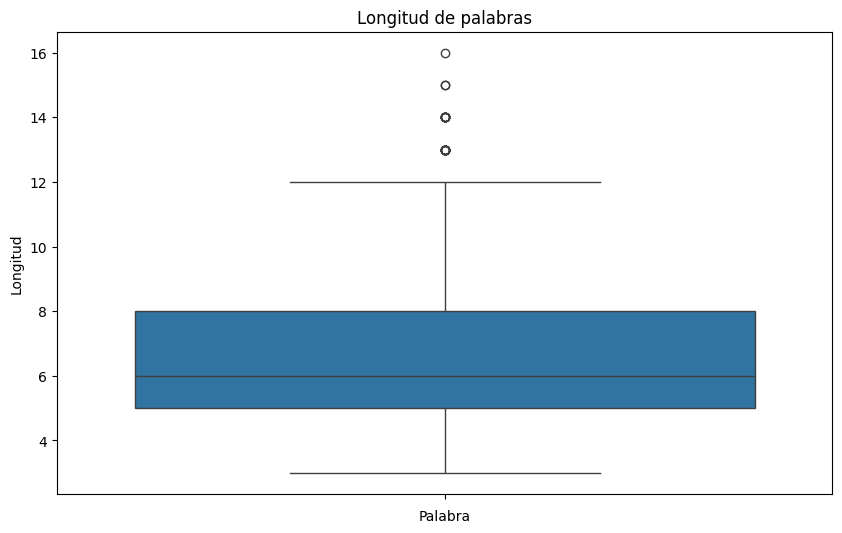

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_longitud_palabras_total["Longitud"])
plt.title('Longitud de palabras')
plt.ylabel('Longitud')
plt.xlabel('Palabra')

####Palabras más repetidas con longitud mayor a 12

Gracias al gráfico anterior vemos que por encima de los 12 caracteres las palabras se pueden considerar "outliers", sin embargo esta información es importante para nuestro análisis ya que nos interesaría encontrar un patrón entre las palabras largas y la predicción de spam.
Entonces, vamos a filtrar para quedarnos solo con las palabras que tienen más de 12 caracteres de longitud

In [54]:
df_copia = df.copy()
df_copia = df.loc[:, [col for col in df_copia.columns if len(col) > 12]]
df_copia['Prediction'] = df['Prediction']
df_copia

,international,approximately,transportation,understanding,reliantenergy,communications,communication,uncertainties,representative,opportunities,...,discrepancies,confidentiality,prescriptions,implementation,advertisement,organizational,unfortunately,clarification,infrastructure,Prediction
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
df_spam = df_copia[df_copia['Prediction'] == 1]
palabras_spam = df_spam.sum()
palabras_spam = palabras_spam.drop(palabras_spam.index[-1])
palabras_spam = palabras_spam.sort_values(ascending=False)
palabras_spam

international       202
communication        81
uncertainties        79
communications       46
representative       44
customerservice      40
opportunities        33
prescriptions        31
advertisement        29
entertainment        28
approximately        27
confidentiality      22
infrastructure       15
understanding        14
automatically        13
transportation        9
administration        8
unfortunately         8
responsibility        7
documentation         5
functionality         4
implementation        4
clarification         2
availabilities        0
counterparties        0
responsibilities      0
discrepancies         0
reliantenergy         0
organizational        0
dtype: int64

In [56]:
df_no_spam = df_copia[df_copia['Prediction'] == 0]
palabras_no_spam = df_no_spam.sum()
palabras_no_spam = palabras_no_spam.drop(palabras_no_spam.index[-1])
palabras_no_spam = palabras_no_spam.sort_values(ascending=False)
palabras_no_spam

communication       101
transportation       90
approximately        88
reliantenergy        80
understanding        78
availabilities       68
communications       67
counterparties       47
representative       42
responsibility       40
opportunities        37
responsibilities     35
functionality        33
discrepancies        30
administration       29
documentation        29
organizational       28
automatically        28
international        25
clarification        24
implementation       22
unfortunately        17
confidentiality      13
entertainment         9
infrastructure        7
advertisement         4
customerservice       0
prescriptions         0
uncertainties         0
dtype: int64

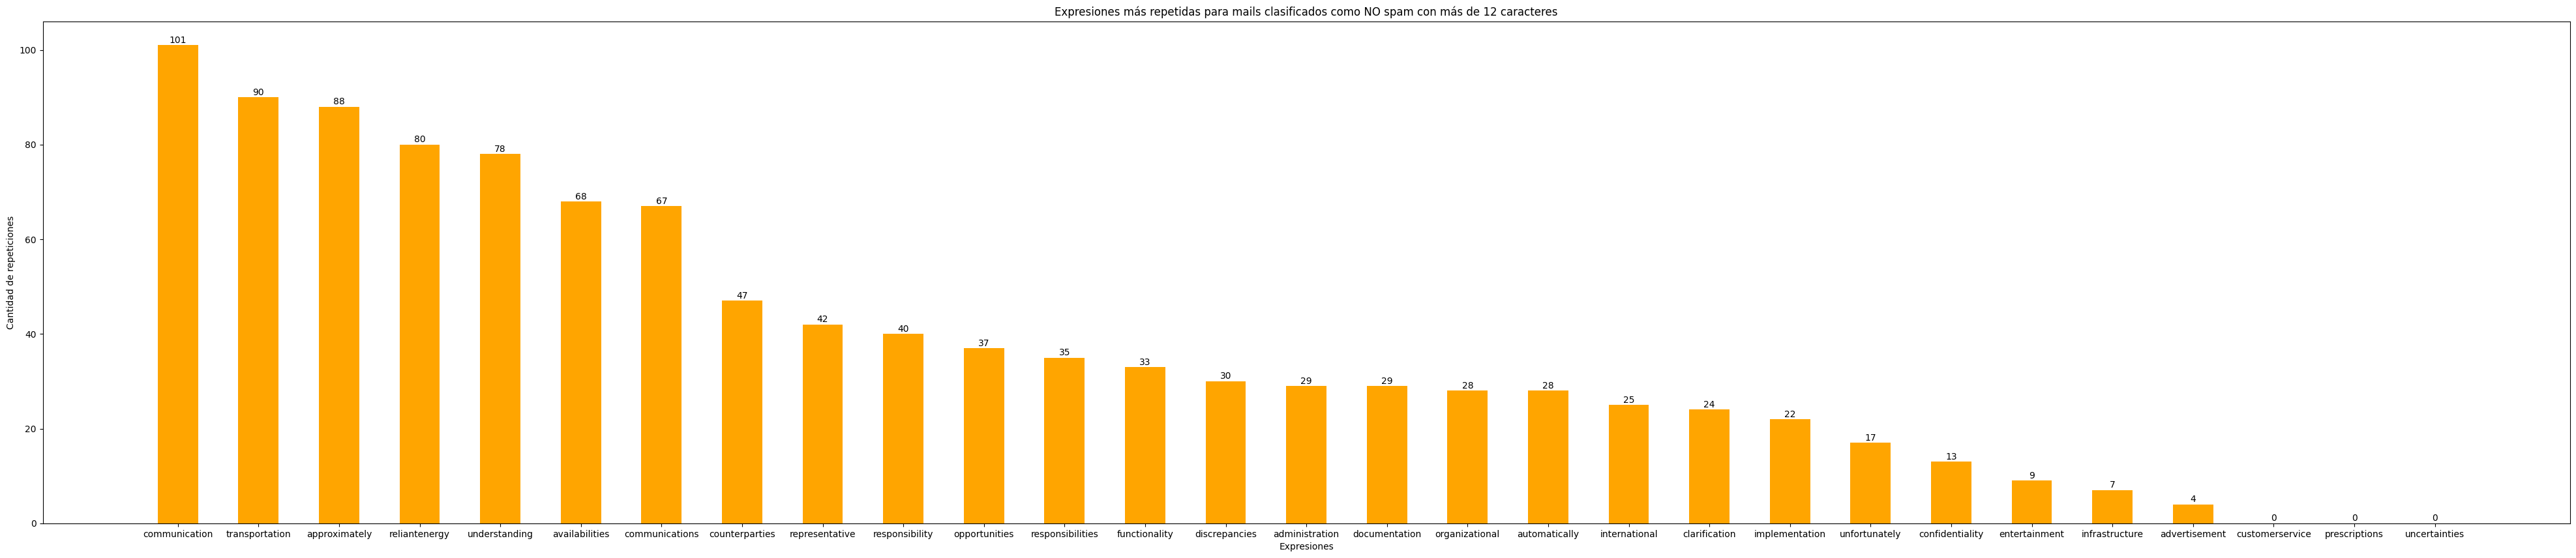

In [57]:
# Expresiones más repetidas para mails clasificados como NO spam

fig, ax = plt.subplots(figsize=(50, 10))

ax.bar(palabras_no_spam.index, palabras_no_spam.values, color="orange", width=0.5)

ax.set_xlabel('Expresiones')
ax.set_ylabel('Cantidad de repeticiones')
ax.set_title('Expresiones más repetidas para mails clasificados como NO spam con más de 12 caracteres')

labels = palabras_no_spam.tolist()
rects = ax.patches

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 2, label, ha="center", va="top"
    )

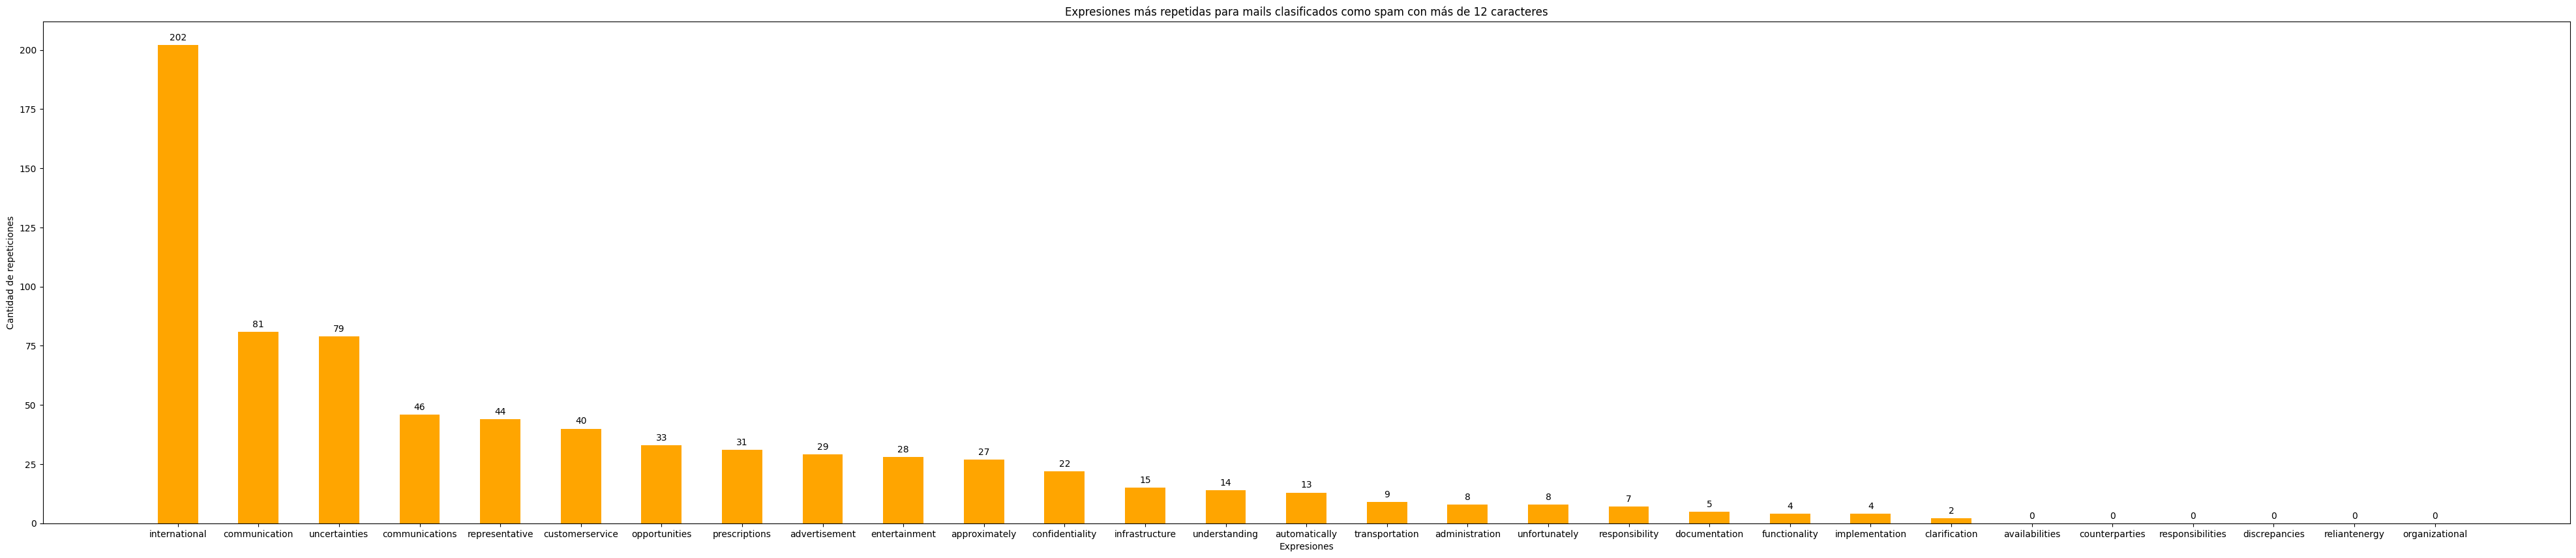

In [58]:
# Expresiones más repetidas para mails clasificados como spam

fig, ax = plt.subplots(figsize=(50, 10))

ax.bar(palabras_spam.index, palabras_spam.values, color="orange", width=0.5)

ax.set_xlabel('Expresiones')
ax.set_ylabel('Cantidad de repeticiones')
ax.set_title('Expresiones más repetidas para mails clasificados como spam con más de 12 caracteres')

labels = palabras_spam.tolist()
rects = ax.patches

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="top"
    )

##Conclusión

En resumen, lo presentado en este trabajo no solo nos sirve para obtener una visión detallada del dataset elegido, sino que nos permite tener un punto de partida para los siguientes desarrollos que se realizarán en este curso relacionados a realizar un modelo que nos permita predecir nuestra variable ‘Prediction’.

Los gráficos realizados son también un ejemplo de los datos que podemos llegar a obtener utilizando las librerías antes mencionadas, y no deben ser tomados como la única información que tenemos acerca de nuestro conjunto de datos. Si bien se presentaron visualizaciones que nos brindan bastante información, es claro que a medida que se vaya avanzando en el desarrollo de los siguientes trabajos estas visualizaciones se pueden ir moldeando a medida de lo que vamos a necesitar.